In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import random

In [2]:
df = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\sberbank_russian_housing_market\house-prices-advanced-regression-techniques\train.csv')
df.shape

(1460, 81)

In [3]:
# Fill NaN values with 0
df.fillna(0, inplace=True)

In [4]:
# Get feature columns and target column
columns = df.columns[:-1]
target = df.columns[-1]

# Clean data
# Split data into numeric and non_numeric
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
non_numeric_cols = [col for col in df.columns if df[col].dtype in ['object', 'string']]

# Generate random seed for dataset
df['random'] = np.random.rand(len(df))

# Train-test split of data via 70-30% split of random number
train = df[df['random'] > 0.3]
test = df[df['random'] <= 0.3]

# Define feature columns and target for train and test
X_train = train[numeric_cols]
y_train = train[target]
X_test = test[numeric_cols]
y_test = test[target]


In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X=X_train, y=y_train)

RandomForestRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

MAE: 347.1984164859003
MSE: 867111.5905698476
RMSE: 931.1882680585315
R-squared: 0.9998388965420967


In [24]:
from sklearn.model_selection import GridSearchCV

# Select hyperparameters to check
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [4, 6, 8, 10, 12, 14],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# Perform grid search or Random Forest model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_model.fit(X_train, y_train)

# Display best hyperparameters that were found in the grid search
print(CV_model.best_params_)

{'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 200}


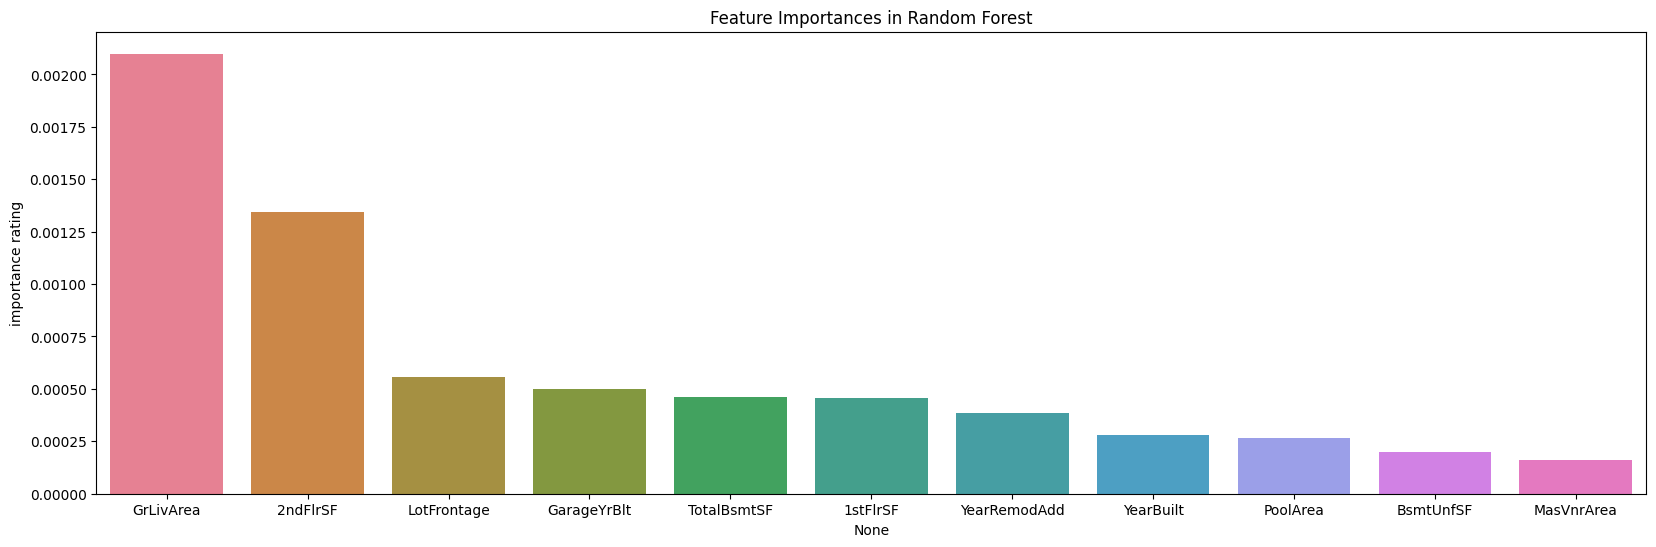

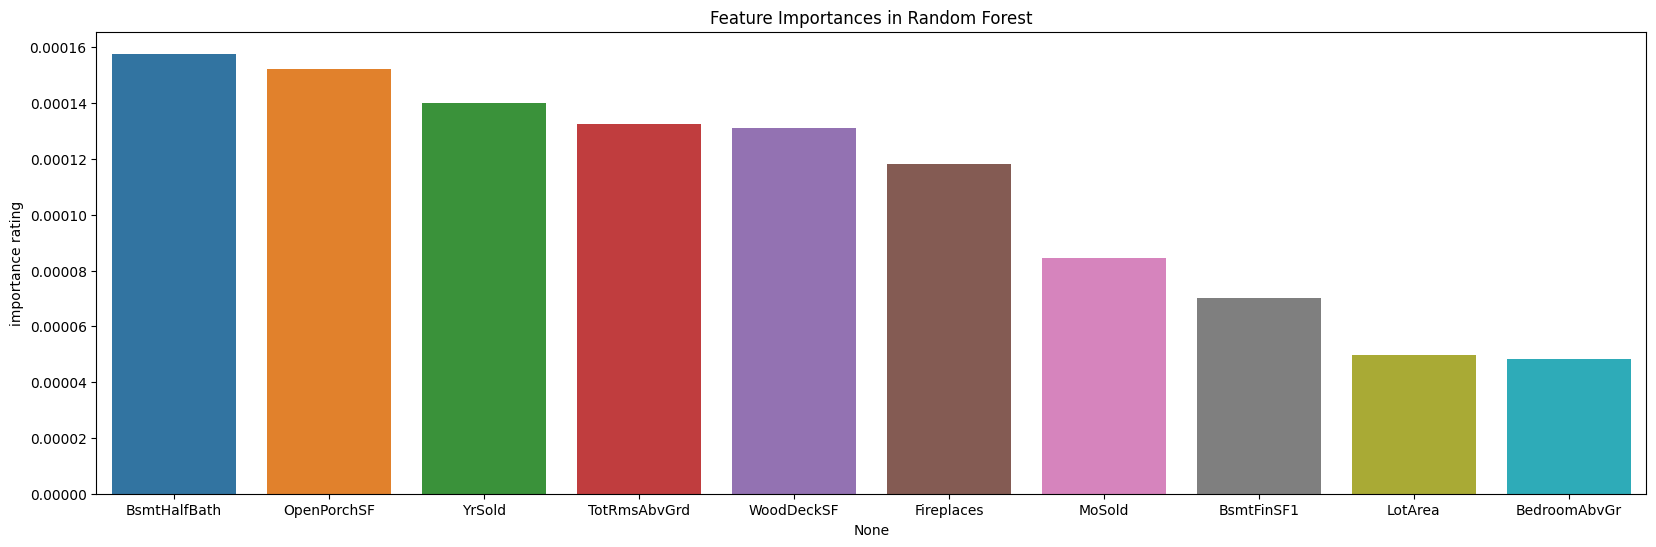

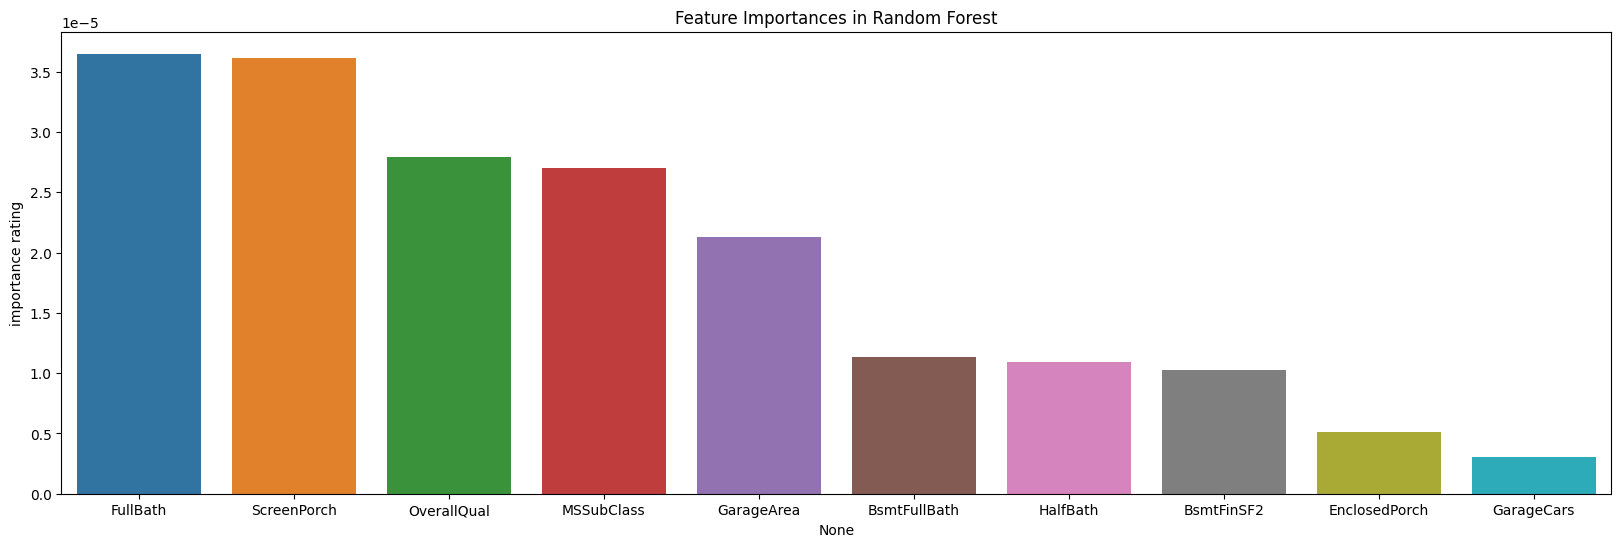

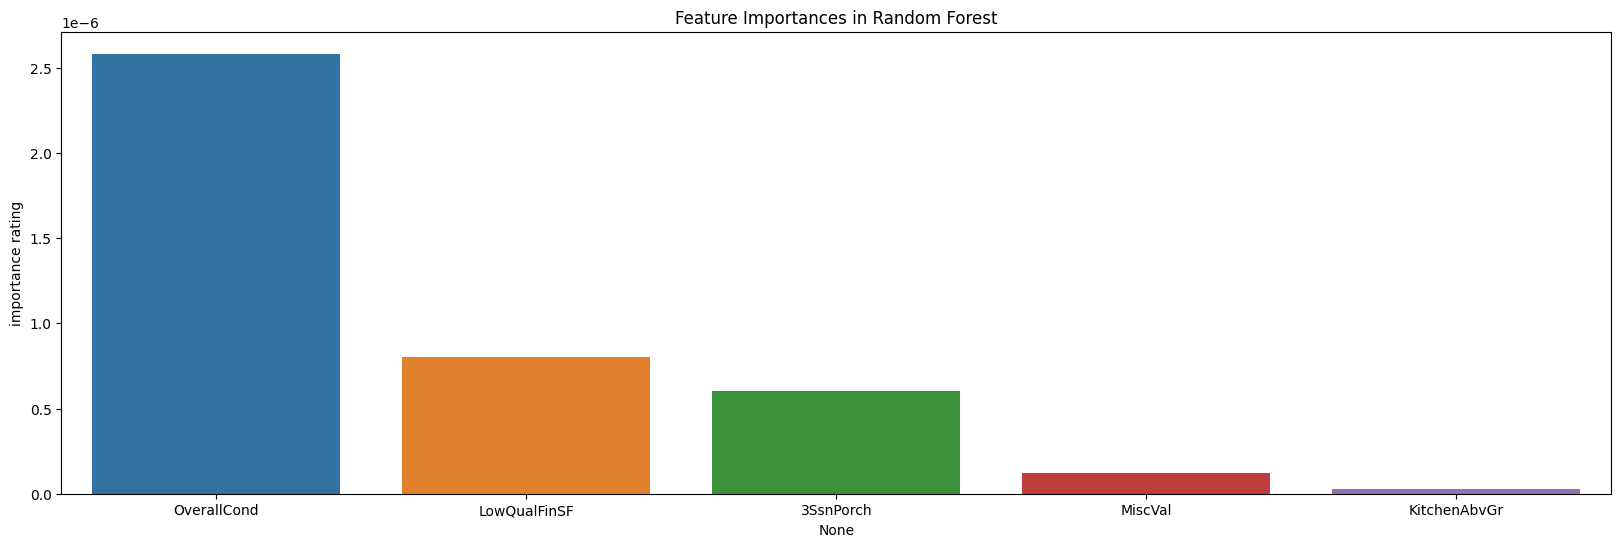

In [70]:
import seaborn as sns

# Extract feature importance ratings for the Random Forest model
importances = model.feature_importances_

# Sort feature importance values in descending order and convert into a Series
feature_importances_sorted = pd.Series(importances, index=X_train.columns).sort_values(ascending=False, inplace=True)

# Display Series
feature_importances = pd.DataFrame(data=importances, index=X_train.columns, columns=['importance rating']).drop(['Id', 'SalePrice'])
feature_importances.sort_values(by='importance rating', ascending=False, inplace=True)

# Split into groups for display purposes
first_10 = feature_importances.iloc[:11]
second_10 = feature_importances.iloc[11:21]
third_10 = feature_importances.iloc[21:31]
last_8 = feature_importances.iloc[31:]

# Plot the feature importance series
plt.figure(figsize=(20, 6))
plt.title('Feature Importances in Random Forest')
sns.barplot(x=first_10.index, y=first_10['importance rating'], hue=first_10.index)
plt.show()

plt.figure(figsize=(20, 6))
plt.title('Feature Importances in Random Forest')
sns.barplot(x=second_10.index, y=second_10['importance rating'], hue=second_10.index)
plt.show()

plt.figure(figsize=(20, 6))
plt.title('Feature Importances in Random Forest')
sns.barplot(x=third_10.index, y=third_10['importance rating'], hue=third_10.index)
plt.show()

plt.figure(figsize=(20, 6))
plt.title('Feature Importances in Random Forest')
sns.barplot(x=last_8.index, y=last_8['importance rating'], hue=last_8.index)
plt.show()
